<a href="https://colab.research.google.com/github/AnIsAsPe/RNN-Resumenes-de-Texto/blob/main/Notebooks/Word_embeddings_Word2Vec_espa%C3%B1ol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import gensim         # Procesamiento de lenguaje natural (NPL)

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns  

# Cargar vectores de palabras Word2Vec en español
Bajaremos los vectores word2vec en español entrenado con un corpus de 3 mil millones de palabras provenientes de noticias, Wikipedia, obras literiarias, entre otras fuentes.

Cuenta con cerca de 2 millones vectores de 400 dimensiones correspondientes a 3  palabras y frases en inglés

In [ ]:
#!wget wget -c "https://zenodo.org/record/1410403/files/keyed_vectors.zip"
#!unzip /content/keyed_vectors.zip -d /content/drive/MyDrive/Datos/Embeddings/Spanish3B_words_Word2Vec/

In [3]:
from gensim.models import KeyedVectors  #comparación keyedVectors y fullmodels https://radimrehurek.com/gensim/models/keyedvectors.html

w2v = gensim.models.KeyedVectors.load('/content/drive/MyDrive/Datos/Embeddings/Spanish3B_words_Word2Vec/complete.kv', mmap='r')

# Creación de diccionario de palabras y vectores

In [4]:
%%time
dic_word2vec  = {}
for palabra in w2v.index2word:
  dic_word2vec[palabra] = w2v[palabra]


CPU times: user 13.9 s, sys: 188 ms, total: 14.1 s
Wall time: 13.9 s


In [6]:
dic_word2vec['planta']

memmap([ 0.673608  ,  2.5885968 , -3.7569711 ,  1.8713883 ,  2.3438947 ,
         1.7675555 ,  2.660236  ,  1.3212004 , -0.44881892,  1.0341976 ,
         3.4285681 ,  0.89243525, -0.7293736 , -2.0114117 , -1.2407435 ,
        -0.12474917, -3.1669447 , -2.2811084 , -0.32698   ,  0.6957156 ,
        -2.3910468 ,  3.4864166 , -0.75878227,  1.8459582 ,  1.1380686 ,
         0.41992778, -1.6034539 , -3.7884412 ,  0.6609573 , -0.6643043 ,
         1.542805  ,  0.64248854, -0.15249176,  2.751133  ,  3.3297608 ,
        -0.67949456, -0.27869412,  0.07663515, -0.9206051 ,  4.673673  ,
         1.5931299 , -2.6142366 , -3.3264334 ,  2.1691422 , -2.0331814 ,
        -2.5028436 ,  0.67121834,  3.5437663 ,  0.85228103, -1.0141773 ,
        -0.51989096,  0.4164433 , -1.5620613 , -1.1478196 , -0.28966075,
         1.788148  , -4.0224338 , -0.01035809,  2.62511   , -1.0142078 ,
         0.7214878 ,  0.9517426 ,  1.5854564 ,  2.5241177 , -1.1684921 ,
         0.6975246 ,  0.84311455, -0.53149515, -1.2

In [ ]:
# Número de palabras
vocabulario = dic_word2vec.keys()
len(vocabulario)

1943871

In [ ]:
# Dimensiones de cada vector
len(dic_word2vec['hola'])

400

In [ ]:
dic_word2vec['hombre']

memmap([-1.31495941e+00, -1.98872304e+00, -1.86211646e-01,
         9.61444378e-01,  2.20690012e+00,  4.43114072e-01,
        -2.33116460e+00,  1.38949227e+00,  1.69468570e+00,
        -2.24609971e+00, -5.43616593e-01,  3.63157302e-01,
        -6.76042080e-01,  2.31987929e+00, -9.22089368e-02,
        -4.46972370e+00,  1.10681045e+00,  1.18317282e+00,
         2.46013093e+00,  1.06966126e+00, -1.52188122e-01,
         1.40449062e-01, -1.80975187e+00,  7.04750299e-01,
         1.91424584e+00,  8.76189649e-01, -5.45694172e-01,
         1.58734858e+00,  3.18974853e-01, -9.20872271e-01,
         1.50591159e+00,  1.41053498e+00, -1.39159286e+00,
         9.35539305e-01,  1.05770600e+00, -1.08588529e+00,
         3.00415874e+00, -3.46873593e+00, -8.80441889e-02,
        -2.18704128e+00, -1.72438347e+00,  2.82911062e+00,
        -3.34625506e+00,  1.77827096e+00,  2.00192794e-01,
         2.74990988e+00,  1.35027874e+00,  9.69016671e-01,
         1.05783904e+00,  1.01024210e+00,  7.35530198e-0

# Ejemplos de vectores de palabras

In [ ]:
ejemplos = 'hombre mujer esposo esposa rey reina'.split()

#Construcción de un dataframe con los vectores de las palabras elegidas
vectores = {palabra: dic_word2vec[palabra] for palabra in ejemplos}
X = pd.DataFrame.from_dict(vectores, orient='index')

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
hombre,-1.314959,-1.988723,-0.186212,0.961444,2.206900,0.443114,-2.331165,1.389492,1.694686,-2.246100,-0.543617,0.363157,-0.676042,2.319879,-0.092209,-4.469724,1.106810,1.183173,2.460131,1.069661,-0.152188,0.140449,-1.809752,0.704750,1.914246,0.876190,-0.545694,1.587349,0.318975,-0.920872,1.505912,1.410535,-1.391593,0.935539,1.057706,-1.085885,3.004159,-3.468736,-0.088044,-2.187041,...,0.403152,1.718250,1.175799,1.517562,1.238738,1.629143,3.377792,0.035849,-1.063898,-0.106362,3.431478,-1.175779,-1.317961,-1.257704,1.358864,1.078265,0.756954,3.152755,2.109745,-0.360549,2.091900,1.864231,0.541319,4.605249,1.182767,-0.731153,0.436539,-1.251345,0.091795,0.702712,2.126309,-2.004818,-0.539526,2.057134,0.095133,-1.247631,1.805603,-1.157527,2.253980,0.995769
mujer,-2.077840,-0.550113,-2.241080,-1.130049,0.423485,1.253572,1.823793,1.564688,1.346433,-0.638080,0.718747,2.082812,2.872498,-1.031655,-0.661740,-3.206461,-0.509890,-3.760481,0.001092,-2.144511,3.550493,3.000413,-2.547569,2.514799,1.015022,1.914981,0.779757,1.750895,-1.434963,-0.089325,2.601514,0.885652,-2.148863,1.752633,2.555921,-0.960628,1.482399,-0.523788,-1.101255,-0.505045,...,1.222360,2.416243,-0.703811,-0.109421,0.035652,0.753843,0.990145,-1.427120,-0.407840,-1.218591,-0.482682,0.002427,1.004573,-0.546611,3.627699,2.080340,0.602916,1.247518,1.789270,-1.504276,-0.039075,-2.548123,-0.478504,3.068811,0.713750,1.206726,0.421383,0.431425,-1.676448,0.433260,2.047893,0.802070,1.143705,-2.771217,1.040919,1.405972,0.779694,1.193938,-1.475454,-0.874034
esposo,-2.621574,-0.267425,-0.870537,-1.676625,0.291789,1.438635,-1.063814,0.107669,2.075884,0.386489,-0.297800,-0.217898,0.976260,-0.208084,-2.595913,-0.980451,0.138517,0.525415,2.729472,0.009607,1.159801,-1.304491,-1.201344,-0.011906,1.073126,-0.388915,0.077069,1.569722,-1.641128,0.826475,1.149458,-0.604601,0.072174,-0.810795,2.206968,-1.153450,1.633220,-0.492290,-0.634787,-3.058422,...,1.138157,-0.154453,-0.598279,-1.047562,0.324699,-1.183770,-0.219566,-0.927846,-1.255992,-0.623131,0.380540,-2.444574,-0.026781,2.291712,0.030407,2.568968,-0.022174,1.090983,2.053393,-0.981602,-0.523377,-0.724741,-1.310543,1.309039,0.028997,1.036006,-0.919250,-2.471488,-0.402656,0.201113,2.911475,-0.060960,-1.042016,-0.400708,1.404137,1.679655,-0.063784,-0.394775,-1.934093,1.120211
esposa,-3.248047,0.939134,-0.560967,-0.832707,-0.810145,1.537171,0.473379,-0.297702,2.000487,0.770521,0.822454,0.907630,1.928327,-0.584964,-1.658069,-1.290956,-0.563240,-1.240734,1.362384,-0.012714,1.463969,-0.014287,-0.647407,0.801813,1.455026,0.207357,1.995496,1.649499,-2.746347,0.835412,1.820714,-1.509801,-1.432572,0.158629,3.459975,-1.301800,1.530833,0.242736,-1.118934,-1.886561,...,2.647784,1.284954,0.364388,-1.169467,0.194603,-1.671440,0.277534,-1.913198,-0.878150,-0.180257,-1.199726,-1.627350,0.503008,1.375187,-0.058533,2.549198,-0.418220,1.105620,2.746100,-1.754494,-1.976455,-2.255716,-1.204489,1.336074,-0.638373,1.426885,-1.784237,-0.552192,0.061034,0.123862,2.544955,1.785496,-1.307481,-3.113799,0.535720,2.459757,-0.296335,0.647344,-2.822073,0.266972
rey,-1.802475,-1.559257,1.697581,0.848058,0.543973,2.208756,-1.469159,0.071543,2.224275,3.872682,-1.791799,-1.245718,2.466334,-1.397694,-1.247348,-3.323909,0.594648,4.168289,1.842413,1.907352,0.491070,0.796368,1.578886,0.973158,2.649457,-2.034529,2.367899,-0.619312,0.601066,-1.684465,-0.302074,1.432205,-0.397499,0.432666,-0.316310,0.497851,2.528815,1.255858,0.024013,-3.736486,...,0.745410,1.130934,0.138824,-1.648585,1.448063,-4.120858,-0.757457,-1.187616,-0.185635,1.596349,3.035395,-0.154040,0.864919,2.374204,2.278505,0.586569,0.067537,0.157801,-1.173970,-1.747023,0.689413,1.616812,0.564342,1.542295,1.724794,-0.737441,2.361748,-0.775478,-0.047687

## Visualización de vectores

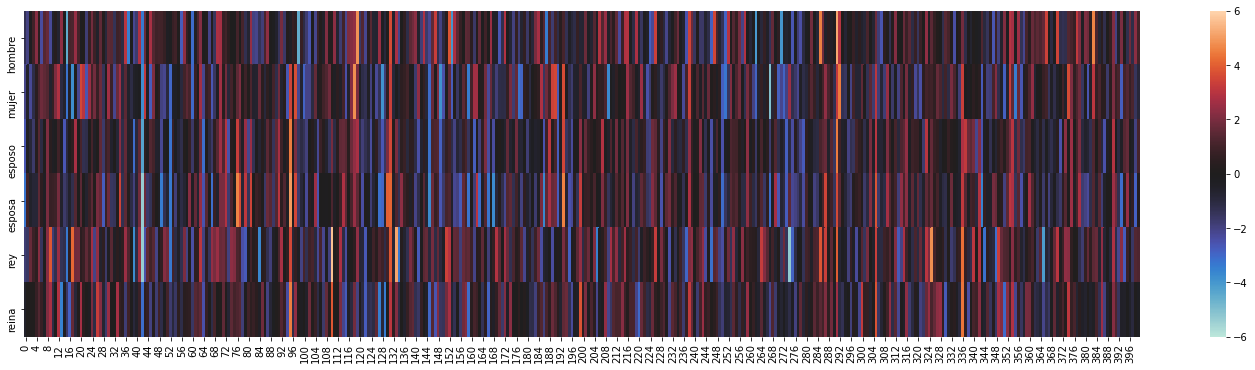

In [ ]:
#Visualización de los vectores de las palabas elegidas
fig = plt.figure(figsize = (25, 6))
ax = sns.heatmap(X, vmin = -6, vmax = 6,center = 0)

##Visualización de vectores en un espacio tridimensional

In [13]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pd.DataFrame(pca.fit_transform(X), index = X.index)
components.reset_index(inplace=True)


fig = px.scatter_3d( components, x=0, y=1, z=2, color='index',  
                    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

NameError: ignored

# Similitud (coseno) entre vectores

In [7]:
def similitud_coseno(a_vector, b_vector):
    '''Calcula la similitud coseno entre los vectores a y b'''

    numerador = np.dot(a_vector, b_vector)
    
    a_norm = np.sqrt(np.sum(a_vector**2))  
    b_norm = np.sqrt(np.sum(b_vector**2))
    
    denominador = a_norm * b_norm
    
    similitud_coseno = numerador / denominador
    
    return similitud_coseno

In [9]:
similitud_coseno(dic_word2vec['computadora'], dic_word2vec['calculadora'])

0.528302

In [14]:
def encuentra_similitudes(palabra, texto):
  lista = texto.split()
  lista.append(palabra)
  vectores = {}
  for p in lista:
    vectores[p] = dic_word2vec[p]
  X = pd.DataFrame.from_dict(vectores, orient='index')

  pca = PCA(n_components=3)
  components = pd.DataFrame(pca.fit_transform(X), index = X.index)
  components.reset_index(inplace=True)

  fig = px.scatter_3d( 
        components, x=0, y=1, z=2, color='index',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
  fig.show()

  palabra_vec = X.loc[palabra, :]
  similitud={}
  for p in lista[:-1]:
    p_vec = X.loc[p,:]
    similitud[p] = similitud_coseno(palabra_vec, p_vec)
  print(pd.Series(similitud).sort_values())


In [15]:
encuentra_similitudes('perro', 'gato pájaro tiburón libélula lobo mariposa araña ardilla')

mariposa    0.172968
libélula    0.180578
araña       0.242797
ardilla     0.387270
tiburón     0.566994
pájaro      0.619912
lobo        0.683267
gato        0.852810
dtype: float64


In [16]:
def encuentra_palabra(a, b, c):
    a, b, c = a.lower(), b.lower(), c.lower()
    a_vector, b_vector, c_vector = dic_word2vec[a], dic_word2vec[b], dic_word2vec[c]

    max_similitud = -1000 #la inicializamos con una similaridad alejada
    mas_parecida = None
    
    for palabra in vocabulario:
        if palabra in [a, b, c]:
            continue
            
        sim_coseno = similitud_coseno(np.subtract(b_vector, a_vector), np.subtract(dic_word2vec[palabra], c_vector))
        
        if sim_coseno > max_similitud:
            max_similitud = sim_coseno
            mas_parecida = palabra
            
    return mas_parecida, sim_coseno

In [ ]:
%time encuentra_palabra('rey', 'mujer', 'hombre')

CPU times: user 1min 35s, sys: 2.83 s, total: 1min 38s
Wall time: 1min 43s


('chica', 0.05741523)

In [17]:
def encuentra_palabras_parecidas(palabra, n):
    palabra = palabra.lower()
    palabra_vector = dic_word2vec[palabra]
    
    max_similitud = -1000 #la inicializamos con una similaridad alejada
    mas_parecida = None
    
    similaridad ={}
    for p in vocabulario:
        if p is palabra:
            continue
            
        similaridad[p] = similitud_coseno(palabra_vector,dic_word2vec[p])
        
    similaridad_ordenada = {k:v for k,v in sorted(similaridad.items(),
                                                  key=lambda x: x[1],
                                                 reverse=True)}
    lista_palabras = list(similaridad_ordenada.keys())
            
    return lista_palabras[0:n]


In [ ]:
encuentra_palabras_parecidas('gato',15)

['gato',
 'perro',
 'gatito',
 'conejo',
 'ratón',
 'cachorro',
 'perrito',
 'zorro',
 'oso',
 'animalito',
 'tigre',
 'lagarto',
 'mapache',
 'perrillo',
 'animal']

# Recursos

1. Almeida A. aitoralmeida/spanish_word2vec [Internet]. 2021 [citado 4 de mayo de 2021]. Disponible en: https://github.com/aitoralmeida/spanish_word2vec
2. Ganesan K. Easily Access Pre-trained Word Embeddings with Gensim [Internet]. Kavita Ganesan, Ph.D. 2019 [citado 4 de mayo de 2021]. Disponible en: https://kavita-ganesan.com/easily-access-pre-trained-word-embeddings-with-gensim/
3. Picture DS Nikhil Thorat, Charles Nicholson, Big. Embedding projector - visualization of high-dimensional data [Internet]. [citado 4 de mayo de 2021]. Disponible en: http://projector.tensorflow.org
4. Python | Word Embedding using Word2Vec [Internet]. GeeksforGeeks. 2018 [citado 4 de mayo de 2021]. Disponible en: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/
5. Alammar J. The Illustrated Word2vec [Internet]. [citado 4 de mayo de 2021]. Disponible en: http://jalammar.github.io/illustrated-word2vec/
([traduccido al español](https://tacosdedatos.com/word-to-vec-ilustrado))

